In [249]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler , MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , roc_auc_score 
import time
import optuna
from sklearn.model_selection import cross_val_score


In [250]:
#reading the datasets
pd.reset_option('display.max_columns')
x_train = pd.read_csv('../data/X_Train_Data_Input.csv')
y_train = pd.read_csv('../data/Y_Train_Data_Target.csv')
x_test = pd.read_csv('../data/X_Test_Data_Input.csv')
y_test = pd.read_csv('../data/Y_Test_Data_Target.csv')

In [251]:
print(x_train.shape)
x_train.head(3)

(785133, 23)


,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [252]:
print(x_test.shape)
x_test.head(3)

(261712, 23)


,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,...,1,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [253]:
print(y_train.shape)
y_train.head(3)

(785133, 2)


,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0


## <center>Data Cleaning</center>

In [254]:
#checking for missing values 
def missing_values(x):
    
    total = x.isnull().sum().sort_values(ascending = False)
    percent = (total/len(x)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENT'])

miss_values_xtrain = missing_values(x_train)
miss_values_xtrain[miss_values_xtrain!=0]

,TOTAL,PERCENT
Column9,732137.0,93.250061
Column14,365703.0,46.578478
Column5,167180.0,21.293208
Column4,127710.0,16.266034
Column3,126303.0,16.086829
Column15,16456.0,2.095951
Column6,3850.0,0.490363
Column8,3850.0,0.490363
Column0,9.0,0.001146
ID,NaN,NaN


In [255]:
miss_values_xtest = missing_values(x_test)
miss_values_xtest[miss_values_xtest!=0]

,TOTAL,PERCENT
Column9,243853.0,93.176087
Column14,121679.0,46.493474
Column5,55659.0,21.267271
Column4,42710.0,16.319466
Column3,42234.0,16.137586
Column15,5485.0,2.095815
Column6,1234.0,0.471511
Column8,1234.0,0.471511
Column0,2.0,0.000764
ID,NaN,NaN


- **We will be dropping column 9 in both test and train datasets**

In [256]:
x_train.drop('Column9' , axis = 1 , inplace=True)
x_test.drop('Column9' , axis = 1, inplace=True)
x_train.drop('ID' , axis = 1 , inplace= True)
x_test.drop('ID', axis= 1 , inplace= True)
y_train.drop('ID' , axis = 1 , inplace =True)

- **Checking the distribution of the missing values for imputation**

In [257]:
impute_columns = ['Column14' , 'Column5' , 'Column4' , 'Column3' , 'Column15' , 'Column6' , 'Column8', 'Column0']
x_train[impute_columns].describe()

,Column14,Column5,Column4,Column3,Column15,Column6,Column8,Column0
count,419430.000000,617953.000000,657423.000000,658830.000000,768677.000000,781283.000000,781283.000000,785124.000000
mean,-0.000863,-0.000367,-0.000855,-0.000210,-0.000837,-0.000709,-0.000158,0.440757
std,1.291202,1.015255,1.000350,0.999935,1.283393,0.998984,1.056769,1.163275
min,-832.749615,-0.007469,-1.855728,-2.028572,-1091.545904,-0.407939,-0.774979,0.000000
25%,0.001351,-0.007469,-0.577162,-0.675216,0.003390,-0.407939,-0.774979,0.000000
50%,0.001351,-0.007469,0.701403,0.678139,0.003390,-0.407939,0.122085,0.000000
75%,0.001351,-0.007468,0.701403,0.678139,0.003390,-0.367723,0.625528,0.000000
max,8.514416,551.421127,0.701403,0.678139,0.012736,14.985817,323.992484,18.000000


In [258]:
skewness = x_train[impute_columns].skew()
kurtosis = x_train[impute_columns].kurtosis()

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Skewness:
 Column14   -639.970050
Column5     366.846494
Column4      -1.007385
Column3      -1.165275
Column15   -805.439282
Column6       2.589699
Column8      86.605312
Column0       4.074813
dtype: float64
Kurtosis:
 Column14    412518.265513
Column5     167500.843046
Column4         -0.703438
Column3         -0.284689
Column15    681366.420964
Column6          5.443259
Column8      22725.306313
Column0         22.506434
dtype: float64


- **Extreme Skewness :**  Columns - 14 , 5 , 15 , 6   . *Use median imputation*
- **Slight skewness :**   Columns - 3 , 4 , 0 , 8 . *Use mean imputation**

- **Imputing the remaining missing values**

In [259]:
class imputation:
    
    median_cols = ['Column14' , 'Column5' , 'Column15' , 'Column6']
    mean_cols = ['Column3' , 'Column4' , 'Column0' , 'Column8']
    #impute mean values for the missing data 
    def imp_mean(self , x):
        for col in self.mean_cols:
            x[col] = SimpleImputer(strategy='mean').fit_transform(x[[col]])
        return x 
        
    #impute median values for the missing data 
    def imp_median(self ,x):
        for col in self.median_cols:
            x[col] = SimpleImputer(strategy='median').fit_transform(x[[col]])
        return x
        
imp = imputation()
x_train = imp.imp_mean( x = x_train)
x_train = imp.imp_median(x = x_train)
x_test = imp.imp_mean( x = x_test)
x_test = imp.imp_median(x = x_test)

In [260]:
x_train.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

- ***Outlier detection***

In [261]:
#using IQR method to determine the outliers 

Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)

IQR = Q3 - Q1
outliers = ((x_train<(Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR)))
outliers_percentage = (outliers.sum()/len(x_train)) * 100
outliers_percentage.sort_values(ascending=False)

#We will do robust scaling for the columns having outliers more than 15 percent

Column14    36.070067
Column10    24.057453
Column6     22.935222
Column7     21.240096
Column0     19.815114
Column3     17.063861
Column4     13.543947
Column15    13.055622
Column18    13.043268
Column17     2.348137
Column19     1.875861
Column20     0.935128
Column8      0.368600
Column5      0.302114
Column21     0.275749
Column16     0.120107
Column2      0.026110
Column1      0.000000
Column13     0.000000
Column11     0.000000
Column12     0.000000
dtype: float64

___

## <center>Feature Scaling </center>

In [262]:
from scipy.stats import normaltest

# Function to check normality for all columns
def check_normality(x):
    results = {}
    for column in x.columns:
        stat, p = normaltest(x_train[column].dropna())
        results[column] = p
    return results

normality_results = check_normality(x_train)
print(normality_results)

{'Column0': np.float64(0.0), 'Column1': np.float64(0.0), 'Column2': np.float64(0.0), 'Column3': np.float64(0.0), 'Column4': np.float64(0.0), 'Column5': np.float64(0.0), 'Column6': np.float64(0.0), 'Column7': np.float64(0.0), 'Column8': np.float64(0.0), 'Column10': np.float64(0.0), 'Column11': np.float64(0.0), 'Column12': np.float64(0.0), 'Column13': np.float64(0.0), 'Column14': np.float64(0.0), 'Column15': np.float64(0.0), 'Column16': np.float64(0.0), 'Column17': np.float64(0.0), 'Column18': np.float64(0.0), 'Column19': np.float64(0.0), 'Column20': np.float64(0.0), 'Column21': np.float64(0.0)}


- **So we can see that none of the columns follow normal distribution since p value is zero . so we will be using normalization technique**
- **Also we have seen that columns - 14 , 10 , 6 , 7 , 0 , 3 have outliers . So we will be using robust scaling technique**

In [263]:
class DataScaler:
    def __init__(self, robust_columns):
        self.robust_columns = robust_columns
        self.rs = RobustScaler()
        self.mm = MinMaxScaler()
    
    def fit_transform(self, x_train, x_test):
        normalize = [i for i in x_train.columns if i not in self.robust_columns]
        
        for col in self.robust_columns:
            x_train[col] = self.rs.fit_transform(x_train[[col]])
            x_test[col] = self.rs.transform(x_test[[col]])
        
        for col in normalize:
            x_train[col] = self.mm.fit_transform(x_train[[col]])
            x_test[col] = self.mm.transform(x_test[[col]])
        
        return x_train, x_test

robust_columns = ['Column14', 'Column10', 'Column6', 'Column7', 'Column0', 'Column3']
scaler = DataScaler(robust_columns)

x_train_scaled, x_test_scaled = scaler.fit_transform(x_train, x_test)


---

## <center>Feature Engineering</center>

**We will be using 3 Feature Engineering techniques**

- **Forward Feature Selection**
- **Pearson Correlation Co-efficient**
- **Recursive Feature Elimination**

***1. Pearson Correlation Co-efficient***

The Pearson correlation coefficient measures the linear relationship between two variables. It helps identify highly correlated features, which can be removed to reduce multicollinearity. This improves model performance and interpretability.


In [310]:
df_x = pd.DataFrame(x_train)
df_x['target'] = y_train
correlations = df_x.corr()['target'].drop('target') #finds the correlations of all columns to target variable

#using abs coz -> in many cases we are interested in magnitude (value) instead of direction (pos/negative)
sorted_corr = correlations.abs().sort_values(ascending=False)
pc_features = sorted_corr.index[: 9].tolist() #we will be listing top 10 columns based on their correlation
print(pc_features)
print(sorted_corr[pc_features])

['Column18', 'Column1', 'Column19', 'Column17', 'Column20', 'Column8', 'Column12', 'Column21', 'Column2']
Column18    0.727999
Column1     0.374542
Column19    0.258609
Column17    0.248896
Column20    0.135516
Column8     0.129273
Column12    0.128421
Column21    0.119171
Column2     0.114910
Name: target, dtype: float64


***2. Forward Feature Selection***

It starts with no features and iteratively adds the feature that gives the best performance improvement when added to the already selected features. The performance is measured using the accuracy of a decision tree classifier. The function returns the selected features in the order they were added, along with their corresponding scores. The print statement inside the loop provides a step-by-step log of which feature is selected at each step and its corresponding score. This can be helpful for understanding how the feature selection process is progressing.

In [316]:
max_features = 12
selected_fs = []
ordered_scores = []

for i in range(max_features):
    features_left = list(set(x_train.columns) - set(selected_fs))
    
    best_score = 0
    best_feature = ''

    for feature in features_left:
        temp_selected_features = selected_fs + [feature]
        
        classifier = AdaBoostClassifier(algorithm='SAMME').fit(x_train[temp_selected_features] , y_train)
        y_pred = classifier.predict(x_test[temp_selected_features])
        score = accuracy_score(y_test , y_pred)
        
        if score>best_score:
            best_score = score
            best_feature = feature
            
    selected_fs.append(best_feature)
    ordered_scores.append(best_score)
    
    print(f"Feature {i+1} : {best_feature} with score {best_score}")

print("Selected features:", selected_fs)
print("Ordered scores:", ordered_scores)

Feature 1 : Column18 with score 0.9635056856391759
Feature 2 : Column7 with score 0.9699975545637953
Feature 3 : Column1 with score 0.973787980681054
Feature 4 : Column3 with score 0.9742885309042001
Feature 5 : Column5 with score 0.9742885309042001
Feature 6 : Column0 with score 0.9742885309042001
Feature 7 : Column15 with score 0.9742885309042001
Feature 8 : Column6 with score 0.9742885309042001
Feature 9 : Column10 with score 0.9742885309042001
Feature 10 : Column8 with score 0.9742885309042001
Feature 11 : Column13 with score 0.9742885309042001
Feature 12 : Column16 with score 0.9742885309042001
Selected features: ['Column18', 'Column7', 'Column1', 'Column3', 'Column5', 'Column0', 'Column15', 'Column6', 'Column10', 'Column8', 'Column13', 'Column16']
Ordered scores: [0.9635056856391759, 0.9699975545637953, 0.973787980681054, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 0.9742885309042001, 

In [317]:
fs_features = ['Column18', 'Column7', 'Column1', 'Column3', 'Column5', 'Column0', 'Column15', 'Column6', 'Column10', 'Column8', 'Column13', 'Column16']

***3. Recursive Feature Elimination***

In [264]:
#Recursice Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=300 , solver='liblinear')
rfe = RFE(model , n_features_to_select=13 , step= 3) #since we have a large dataset we will take step (2- 5)
y_train_rfe = np.ravel(y_train.values)
rfe.fit(x_train , y_train_rfe)
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

selected_features_xtrain = x_train.columns[rfe.support_]
selected_features_xtest = x_test.columns[rfe.support_]
print("Selected Features of xtrain" , selected_features_xtrain)
print("Selected Features of xtest " , selected_features_xtest)

Selected Features of xtrain Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column8', 'Column10',
       'Column12', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20'],
      dtype='object')
Selected Features of xtest  Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column8', 'Column10',
       'Column12', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20'],
      dtype='object')


In [268]:
rfe_features = selected_features_xtrain

In [270]:
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

___

## <center> Model Training</center>

- *We will be using Decision Tree , Random Forest , Gradient Boost , ADA Boost techniques for building the models*

In [320]:
feature_sets = {
    
    'Pearson corellation coefficient' : pc_features , 
    'Forward Feature Selection' : fs_features , 
    'Recursive Feature Elimination' : rfe_features
}

for feature_name , feature_set in feature_sets.items():
    print('==================================')
    print('Feature name :' , feature_name)
    print('----------------------------------')

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boost': GradientBoostingClassifier(),
        'Adaboost': AdaBoostClassifier(algorithm='SAMME')
    }

    for model_name, model in models.items():
        model.fit(x_train[feature_set], y_train)
        
        # Make predictions
        y_train_pred= model.predict(x_train[feature_set])
        y_test_pred = model.predict(x_test[feature_set])
        
        # Training set performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
        model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
        
        # Test set performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
        model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
        
        print(model_name)
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print('----------------------------------')
        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')


Feature name : Pearson corellation coefficient
----------------------------------
Decision Tree
Model performance for Training set
- Accuracy: 0.9988
- F1 score: 0.9988
- Precision: 0.9988
- Recall: 0.9988
- Roc Auc Score: 0.9966
----------------------------------
Model performance for Test set
- Accuracy: 0.9640
- F1 score: 0.9640
- Precision: 0.9640
- Recall: 0.9640
- Roc Auc Score: 0.8943


Random Forest
Model performance for Training set
- Accuracy: 0.9988
- F1 score: 0.9988
- Precision: 0.9988
- Recall: 0.9988
- Roc Auc Score: 0.9987
----------------------------------
Model performance for Test set
- Accuracy: 0.9688
- F1 score: 0.9692
- Precision: 0.9696
- Recall: 0.9688
- Roc Auc Score: 0.9199


Gradient Boost
Model performance for Training set
- Accuracy: 0.9725
- F1 score: 0.9733
- Precision: 0.9750
- Recall: 0.9725
- Roc Auc Score: 0.9519
----------------------------------
Model performance for Test set
- Accuracy: 0.9726
- F1 score: 0.9734
- Precision: 0.9752
- Recall: 0.972

- **Forward Feature Selection** - Gradient Boost Accuracy : 97.65 , ADABoost Accuracy : 97.43
- **Recursive Feature Elimination** - Gradient Boost Accuracy : 97.52 (slight overfitting) , ADABoost Accuracy : 97.24

So we will be considering **Forward Feature selection** as our feature selection set .

In [322]:
#Checking the run time of both gradient boost and ada boost algorithm

import time 

#Gradient Boosting 
start_time = time.time()
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(x_train[fs_features] , y_train)
gradient_boost_time = time.time() - start_time

# Adaboost
start_time = time.time()
adaboost = AdaBoostClassifier(algorithm='SAMME')
adaboost.fit(x_train[fs_features], y_train)
adaboost_time = time.time() - start_time

print(f"Gradient Boosting training time: {gradient_boost_time:.2f} seconds")
print(f"Adaboost training time: {adaboost_time:.2f} seconds")


Gradient Boosting training time: 94.11 seconds
Adaboost training time: 23.10 seconds


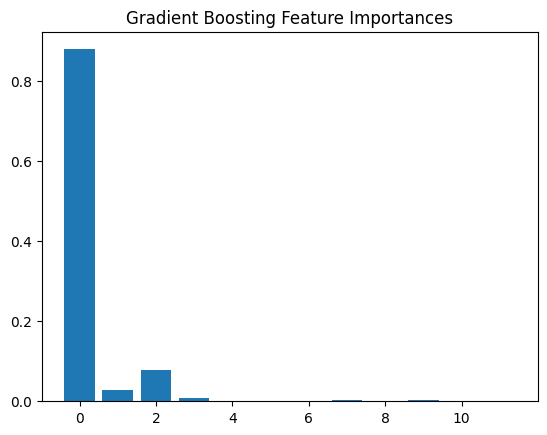

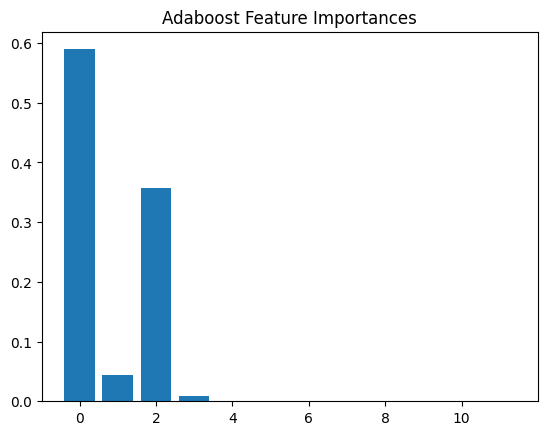

In [323]:
# Gradient Boosting Feature Importance
gradient_boost_importance = gradient_boost.feature_importances_

# Adaboost Feature Importance
adaboost_importance = adaboost.feature_importances_

# Plot feature importances for Gradient Boosting
plt.bar(range(len(gradient_boost_importance)), gradient_boost_importance)
plt.title('Gradient Boosting Feature Importances')
plt.show()

# Plot feature importances for Adaboost
plt.bar(range(len(adaboost_importance)), adaboost_importance)
plt.title('Adaboost Feature Importances')
plt.show()

### Conclusion

- **Gradient Boosting & ADA Boosting** models show the most balanced performance between train & test sets , indicating they are less likely to be overfitting / underfitting . **Random Forest & Decision Tree** shows signs of overfitting .

- **Forward Feature Selection** feature set is giving higher accuracy compared to other Feature sets

- Considering the training time and interpretability of features we can see that **ADA Boost is generally faster and more easily interpretable**. Also **ADABoost** scales better with larger datasets due to its fast training time which allows us for quick iterations and model updates . It also provides better feature interpretability which allows us to make decisions based on feature selection .

___

## <center> Hyper Parameter Tuning </center>

- **RandomSearchCV**

In [272]:
ada_params = {
    'n_estimators' : [50 , 60 , 70 , 80 , 90 , 100 , 150] , 
    'learning_rate' : [0.01 , 0.1 , 1] , 
    'algorithm' : ['SAMME' , 'SAMME.R']
}
print(ada_params)

{'n_estimators': [50, 60, 70, 80, 90, 100, 150], 'learning_rate': [0.01, 0.1, 1], 'algorithm': ['SAMME', 'SAMME.R']}


In [324]:
#Since this is a larger dataset we will be using randomizedsearch cv

from sklearn.model_selection import RandomizedSearchCV

#Converting series to dataframe to join the data and extract sample
y_df = pd.DataFrame(y_train)
y_df.rename(columns={0:'Target'} , inplace=True)
# Assuming x_train and y_train are pandas DataFrames or Series
sampled_data = x_train[fs_features].join(y_df).sample(frac=0.2, random_state=42)
x_train_subset = sampled_data.drop(columns=['Target'])
y_train_subset = sampled_data['Target']
ada_boost = AdaBoostClassifier()
random = RandomizedSearchCV(estimator=ada_boost ,
                            param_distributions=ada_params,
                            n_iter=100,
                            cv = 3,
                            verbose=2 ,
                            n_jobs= - 1, 
                            error_score='raise')
random.fit(x_train_subset , y_train_subset)
best_params = random.best_params_
print(best_params)

C:\Users\10714194\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 42 candidates, totalling 126 fits


C:\Users\10714194\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}


In [325]:
#Using parameters of randomsearchcv for model training

ada= AdaBoostClassifier(n_estimators=100 , learning_rate= 1 , algorithm='SAMME.R')
ada.fit(x_train[fs_features] , y_train)
y_train_fs = ada.predict(x_train[fs_features])
y_test_fs = ada.predict(x_test[fs_features])

# Train set performance
model_train_accuracy = accuracy_score(y_train, y_train_fs) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_fs, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_fs) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_fs) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_fs)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_fs) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_fs, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_fs) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_fs) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_fs) #Calculate Roc

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
    
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
    
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
print('='*35)
print('\n')
    

C:\Users\10714194\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model performance for Training set
- Accuracy: 0.9761
- F1 score: 0.9768
- Precision: 0.8298
- Recall: 0.9391
- Roc Auc Score: 0.9595
----------------------------------
Model performance for Test set
- Accuracy: 0.9761
- F1 score: 0.9768
- Precision: 0.8287
- Recall: 0.9412
- Roc Auc Score: 0.9605




**RandomSearchCV** giving a better accuracy of 97.61 with its parameters

- **Bayesian Optimization**

In [326]:
#Bayesian Optimization

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME'])
    
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
    return cross_val_score(model, x_train[fs_features], y_train, cv=5, n_jobs=-1).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10) #will run 10 trials since the data is huge

print("Best parameters:", study.best_params)


[I 2024-10-06 20:46:16,580] A new study created in memory with name: no-name-e82aada5-b86e-48ea-9300-781657491bcb


[I 2024-10-06 20:47:11,836] Trial 0 finished with value: 0.9638608995344485 and parameters: {'n_estimators': 60, 'learning_rate': 0.11771097627944141, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.9638608995344485.
[I 2024-10-06 20:49:12,279] Trial 1 finished with value: 0.972719272290411 and parameters: {'n_estimators': 129, 'learning_rate': 0.23659278892330382, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.972719272290411.
[I 2024-10-06 20:50:08,528] Trial 2 finished with value: 0.9731574137532416 and parameters: {'n_estimators': 59, 'learning_rate': 0.3749768693927819, 'algorithm': 'SAMME'}. Best is trial 2 with value: 0.9731574137532416.
[I 2024-10-06 20:51:43,592] Trial 3 finished with value: 0.9734045053179148 and parameters: {'n_estimators': 99, 'learning_rate': 0.6257729910827361, 'algorithm': 'SAMME'}. Best is trial 3 with value: 0.9734045053179148.
[I 2024-10-06 20:53:48,175] Trial 4 finished with value: 0.9729574478988967 and parameters: {'n_estimators': 129, '

Best parameters: {'n_estimators': 130, 'learning_rate': 0.4381217552999389, 'algorithm': 'SAMME'}


In [327]:
#Using parameters of Bayesian Optimization for model training

ada_bayesian= AdaBoostClassifier(n_estimators=130 , learning_rate= 0.4381217552999389, algorithm='SAMME')
ada_bayesian.fit(x_train[fs_features] , y_train)
y_train_hp = ada_bayesian.predict(x_train[fs_features])
y_test_hp = ada_bayesian.predict(x_test[fs_features])

# Train set performance
model_train_accuracy = accuracy_score(y_train, y_train_hp) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_hp, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_hp) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_hp) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_hp)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_hp) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_hp, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_hp) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_hp) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_hp) #Calculate Roc

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
    
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
    
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
print('='*35)
print('\n')
    

Model performance for Training set
- Accuracy: 0.9738
- F1 score: 0.9747
- Precision: 0.8103
- Recall: 0.9426
- Roc Auc Score: 0.9598
----------------------------------
Model performance for Test set
- Accuracy: 0.9739
- F1 score: 0.9748
- Precision: 0.8099
- Recall: 0.9445
- Roc Auc Score: 0.9607




- **Since the RandomSearchCV parameters are giving better results we will go with its parameters**
- **We will be using ADA-Boost model and RandomSearchCV for our predictive model :**  
  {n_estimators=100 , learning_rate= 1 , algorithm='SAMME.R'} 

___

## <center>Check for OverFitting</center>

### Cross Validation :

In [328]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv_model  = AdaBoostClassifier(n_estimators=100 , learning_rate= 1 , algorithm='SAMME')

#defining kfold cross validator 
kf = KFold(n_splits = 10, shuffle=True , random_state=42)

#perform cross validation
scores = cross_val_score(cv_model , x_train[fs_features] , y_train , cv = kf , scoring='accuracy')


# Print the results
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.97403011 0.97383906 0.97390274 0.97336747 0.97317642 0.97392788
 0.97276884 0.97427178 0.97462841 0.97527798]
Mean Accuracy: 0.9739190684703001
Standard Deviation: 0.000683527271147606


- **Mean Accuracy** is 0.974 and **Standard Deviation** is 0.00066
- ***High Mean Accuracy suggests that the model has maintained a high level of accuracy across all folds***
- ***Low Standard Deviation suggests that the performance is stable and not varying much betweem subsets of the data***

- *This is a strong sign the model is not overfitting & is generalizing well to unseen data*

### Validation Set:

In [329]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
x_train_v, X_val, y_train_v, y_val = train_test_split(x_train[fs_features], y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = AdaBoostClassifier(n_estimators=80 , learning_rate= 1 , algorithm='SAMME' , random_state=42)
model.fit(x_train_v, y_train_v)

# Ensure the validation data is clean
imputer = SimpleImputer(strategy='mean')
X_val = imputer.fit_transform(X_val)

val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f'Validation Accuracy: {val_accuracy}')

C:\Users\10714194\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.9734376890598432


- **Validation accuracy - 0.9694** indicates that our model is performing well on validation set . The high accuracy suggests that the model isnt overfitting and is able to perform well on unseen data as well .

- **We can conclude that the model isnt overfitting**

___

## <center>MODEL SIMPLIFICATION</center>

Here we will be removing features with zero importance which offer several advantages while handling large datasets . 

- **Reduced complexity also faster training and prediction**
- **Simplified data preprocessing & Enhances Robustness**
- **Easier to explain and Better insights**

Removing features streamlines your model , making it more efficient , interpretable & robust .

In [342]:
adaboost_importance

array([0.58930127, 0.04437721, 0.35682907, 0.00949245, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [345]:
simp_features = ['Column18','Column7','Column1','Column3']

In [346]:
#Using parameters of Bayesian Optimization for model training

ada_bayesian= AdaBoostClassifier(n_estimators=130 , learning_rate= 0.4381217552999389, algorithm='SAMME')
ada_bayesian.fit(x_train[simp_features] , y_train)
y_train_hp = ada_bayesian.predict(x_train[simp_features])
y_test_hp = ada_bayesian.predict(x_test[simp_features])

# Train set performance
model_train_accuracy = accuracy_score(y_train, y_train_hp) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_hp, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_hp) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_hp) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_hp)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_hp) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_hp, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_hp) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_hp) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_hp) #Calculate Roc

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
    
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
    
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
print('='*35)
print('\n')
    

Model performance for Training set
- Accuracy: 0.9738
- F1 score: 0.9747
- Precision: 0.8103
- Recall: 0.9426
- Roc Auc Score: 0.9598
----------------------------------
Model performance for Test set
- Accuracy: 0.9739
- F1 score: 0.9748
- Precision: 0.8099
- Recall: 0.9445
- Roc Auc Score: 0.9607




___